# Confronto dell'evapotraspirazione a Calliano tra il 1935 e il 2020


Basato sui notebook di Concetta D'Amato, Niccolò Tubini, Michele Bottazzi e Riccardo Rigon.

Autori: Niccolò Schiavi Cappello, Marco Feltrin e Lessandro Lagrecacolonna.

Licenza Creative Commons BY-NC 4.0



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import os
from GEOSPACE_Output import*
import warnings
import datetime
import warnings
import xarray as xr
from matplotlib import rc
import matplotlib.style as style
import matplotlib.dates as mdates
from IPython.display import Image
from GEOSPACE_Output import*
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/output/calliano/1')

## Introduzione

Lo scopo di questo notebook consiste nell'analizzare e nel confrontare l'evaporazione dal suolo nudo e l'evapotraspirazione negli anni 2020 e 1935. Questa analisi vuole evidenziare in modo concreto il ruolo del surriscaldamento globale sui fenomeni di evaporazione ed evapotraspirazione.

Per raggiungere questo scopo si è effettuata un'analisi con il metodo di Penmann-Monteth-FAO, andando ad attivare i fattori di temperature stress e radiation stress.

Come periodo di analisi si sono considerati gli anni 1935 e 2020 per intero, si è supposto inoltre che l'intera zona di studio fosse coltivata a vigneto.

Come zona di analisi si è utilizzato un riquadro di 2.5 kilometri quadrati nella zona di Calliano, i dati di temperatura si sono ricavati da Meteotrentino, mentre la radiazione è stata calcolata attraverso delle simulazioni. 
Per tutti gli altri dati si sono utilizzati sia per il 1935 sia per il 2020 i dati riferiti al 2020 (i dati del 1935 non sono disponibili), questa decisione è supportata da una similitudine pluviometrica tra i due anni.

Questa scelta accentua maggiormente il cambiamento dell'evapotraspirazione a causa del surriscaldamento globale.

I parametri forniti al modello sono: temperatura, radiazione netta, flusso di calore dal suolo, umidità dell'aria, contenuto d'acqua del suolo, velocità del vento e pressione atmosferica.

I parametri riguardanti la vegetazione sono stati ricavati dalle tabelle presenti sul sito della FAO.

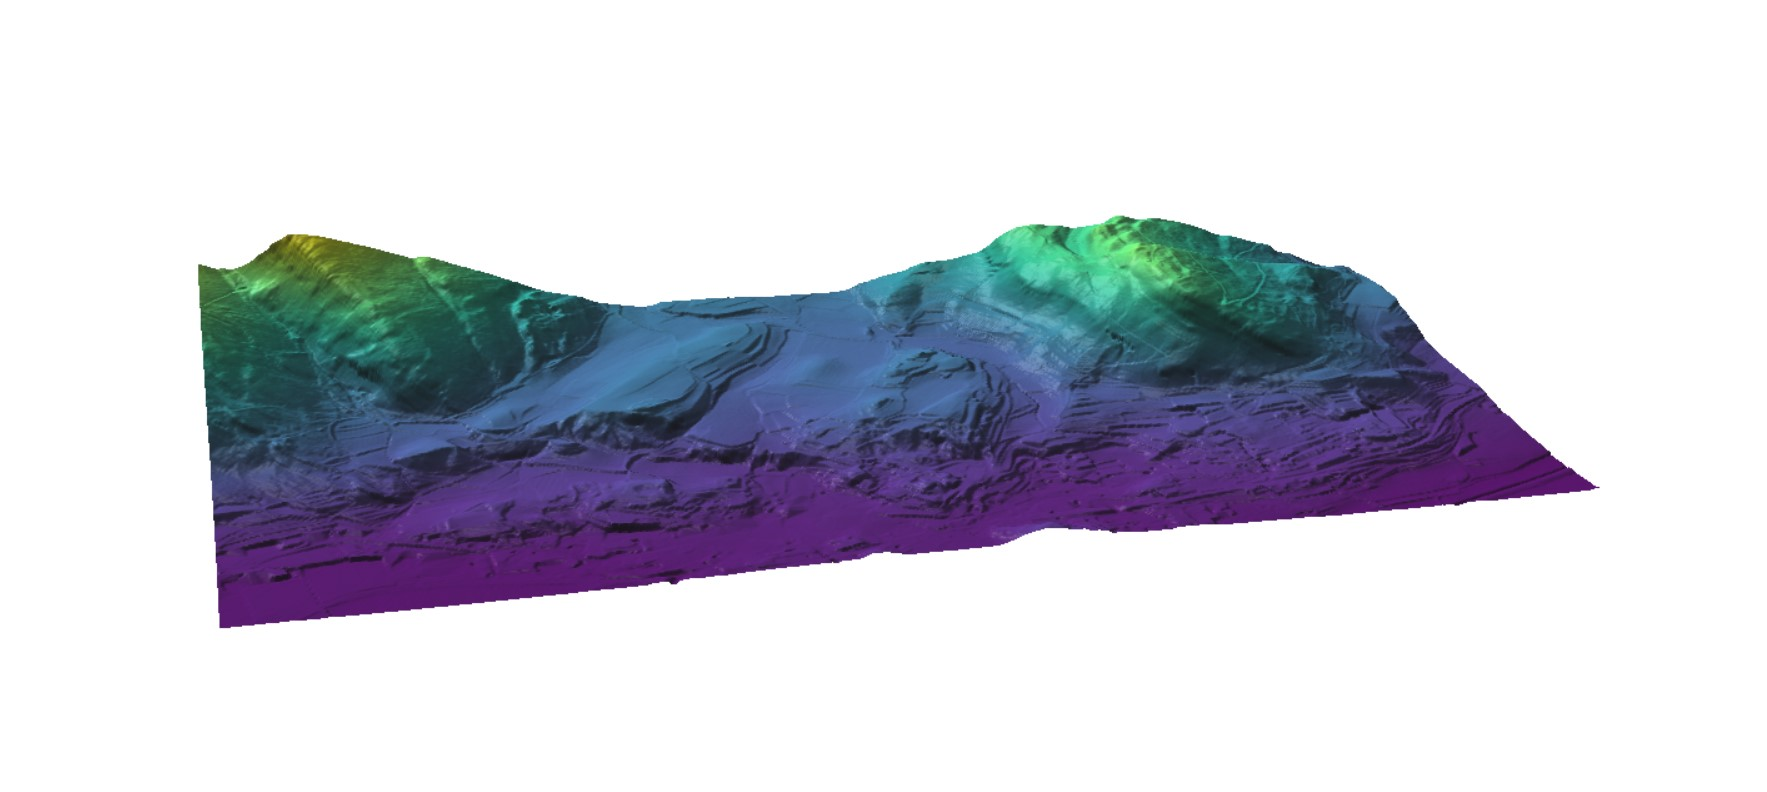

In [3]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\dtm.jpg")

DTM Calliano

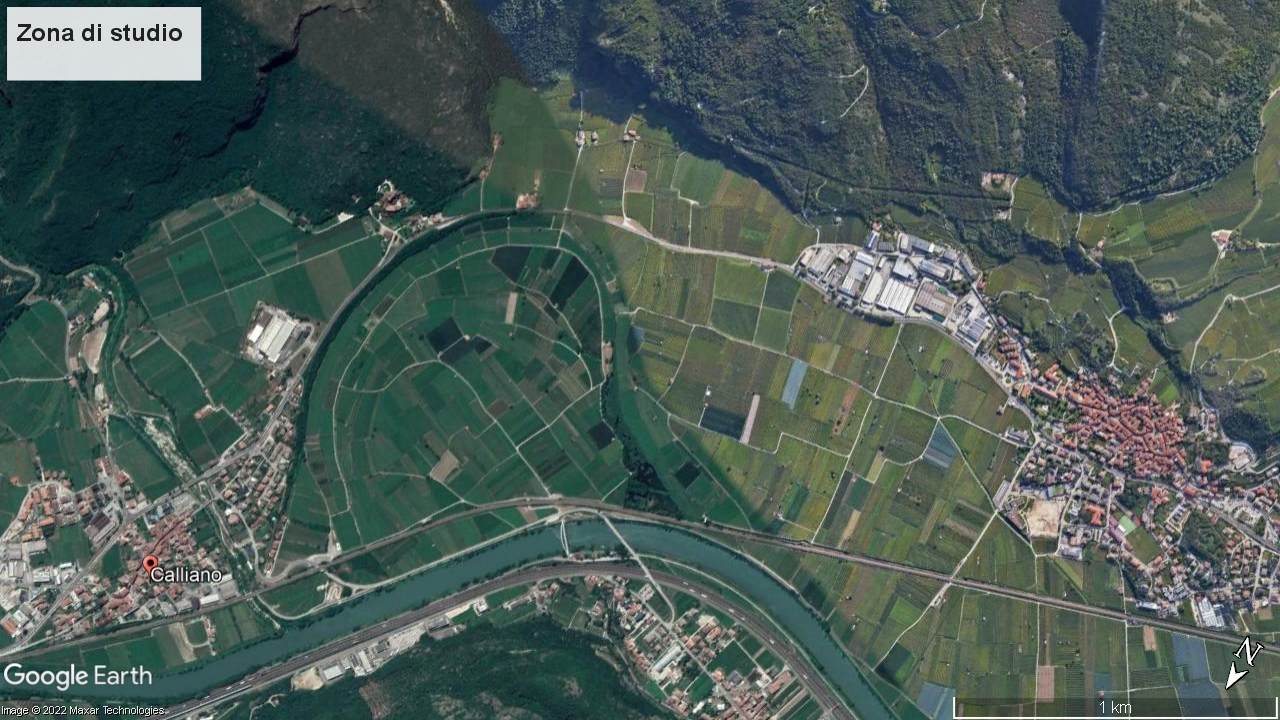

In [5]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\overview.jpg")

## Analisi dei dati di temperatura

In [6]:
temp35=pd.read_csv('35-36.csv')

In [7]:
temp20=pd.read_csv('20_21_t.csv')

In [8]:
df=pd.DataFrame(columns=['2020','1935'])
df['2020']=temp20
df['1935']=temp35

Text(0, 0.5, 'Gradi [°C]')

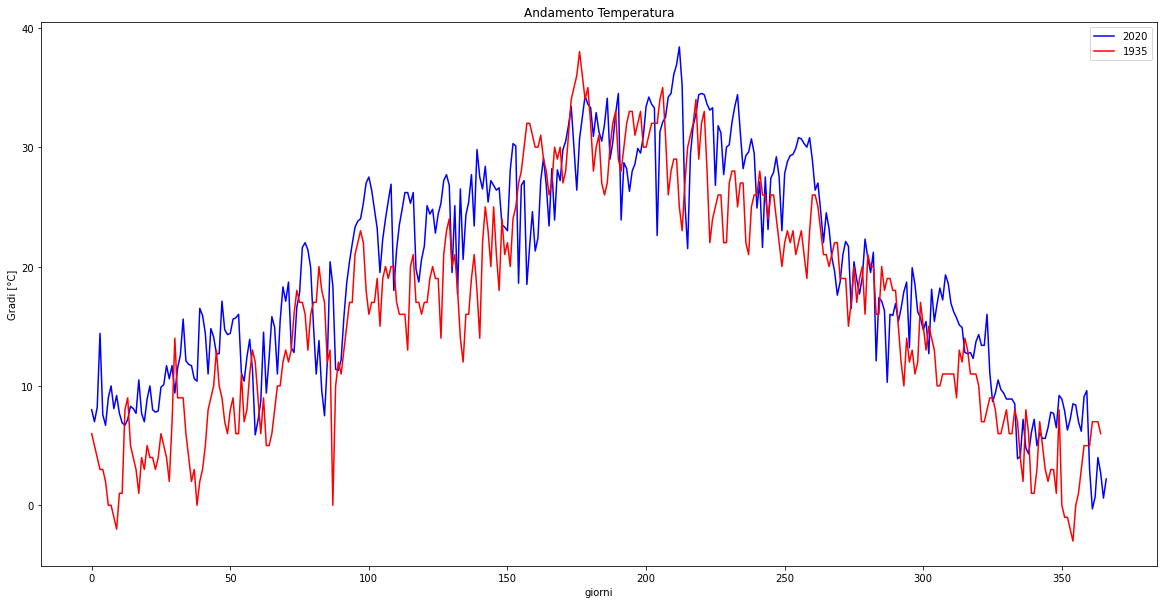

In [9]:
a=df.plot(color=['blue','red'],figsize=[20,10])
a.set_title('Andamento Temperatura')
a.set_xlabel('giorni')
a.set_ylabel('Gradi [°C]')

In [10]:
temp20.mean()

Colonna1    19.608992
dtype: float64

In [11]:
temp35.mean()

8    16.632877
dtype: float64

# Confronto tra le evapotraspirazioni ricavate con Penmann-Montieth-FAO

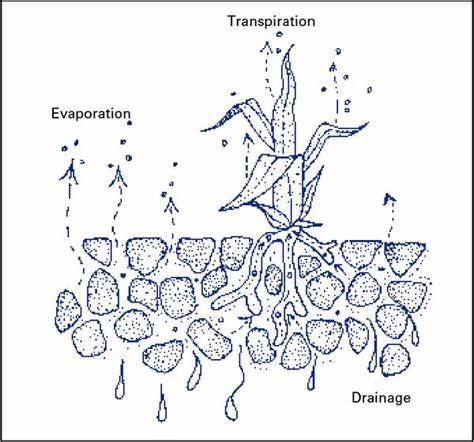

In [12]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\evapotranspiration.jpg")

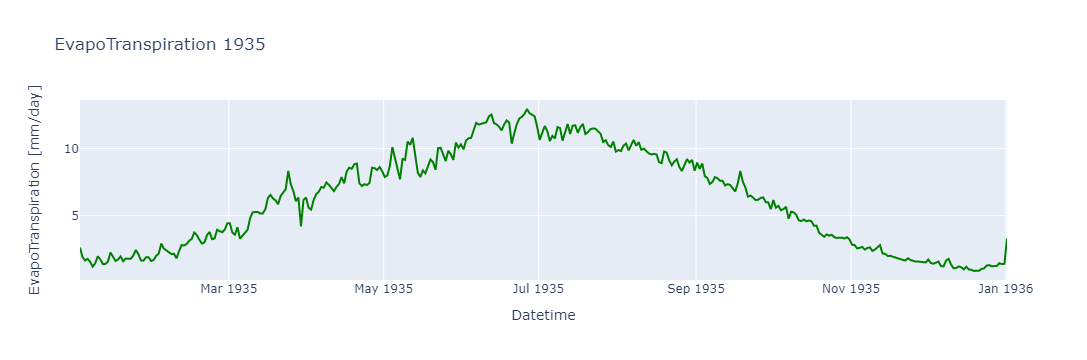

In [13]:
df1 = pd.read_csv('EvapoTranspiration_FAO35_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Datetime','EvapoTranspiration [mm/day]']
fig = px.line(df1, x='Datetime', y='EvapoTranspiration [mm/day]', title='EvapoTranspiration 1935')
fig.update_traces(line_color='green')
fig.show()

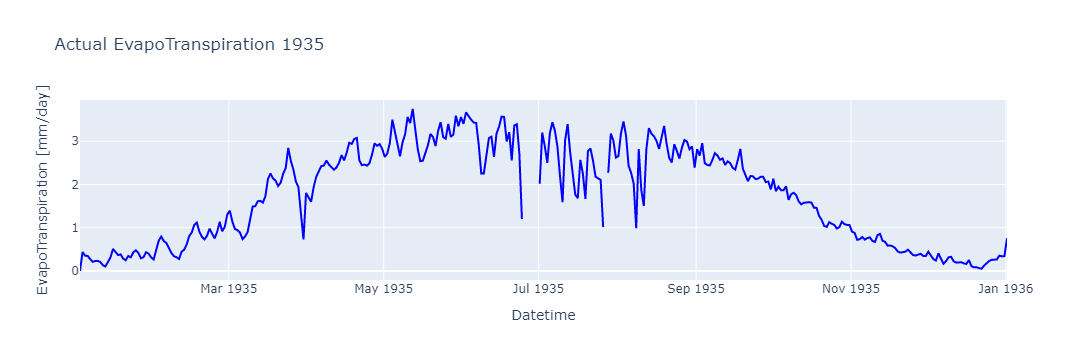

In [14]:
df3 = pd.read_csv('temperaturestressET35_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Datetime','EvapoTranspiration [mm/day]']
fig = px.line(df3, x='Datetime', y='EvapoTranspiration [mm/day]', title='Actual EvapoTranspiration 1935')
fig.update_traces(line_color='blue')
fig.show()

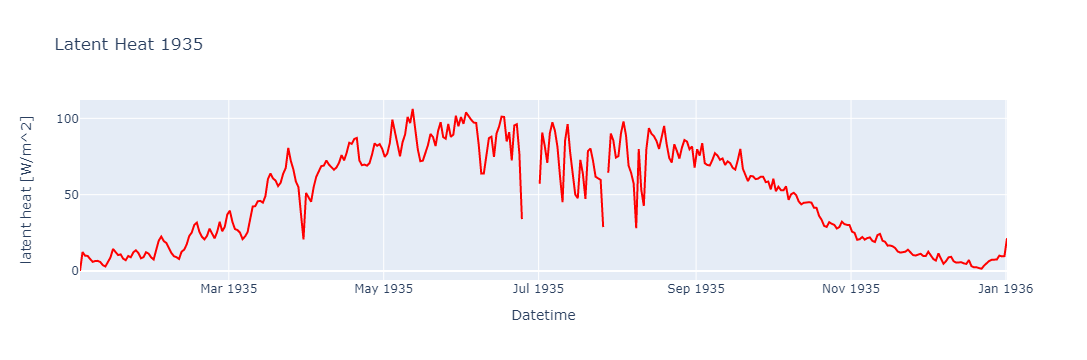

In [15]:
df2 = pd.read_csv('temperaturestressLH35_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','latent heat [W/m^2]']
fig = px.line(df2, x='Datetime', y='latent heat [W/m^2]', title='Latent Heat 1935')
fig.update_traces(line_color='red')
fig.show()

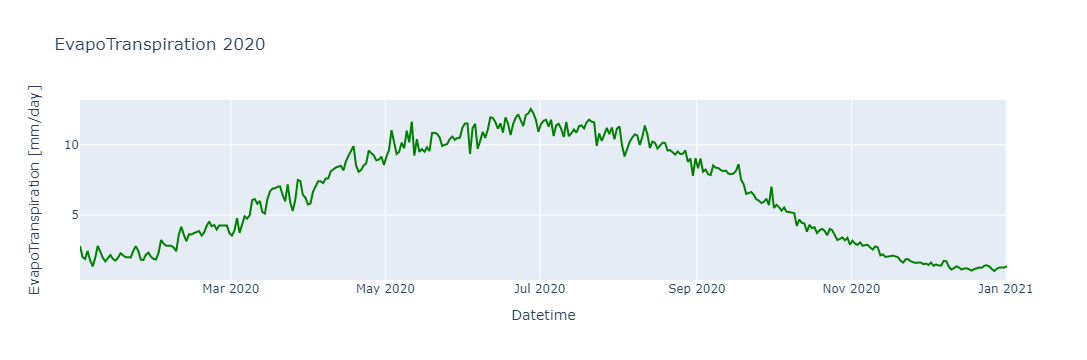

In [16]:
df4 = pd.read_csv('EvapoTranspiration_FAO20_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Datetime','EvapoTranspiration [mm/day]']
fig = px.line(df4, x='Datetime', y='EvapoTranspiration [mm/day]', title='EvapoTranspiration 2020')
fig.update_traces(line_color='green')
fig.show()

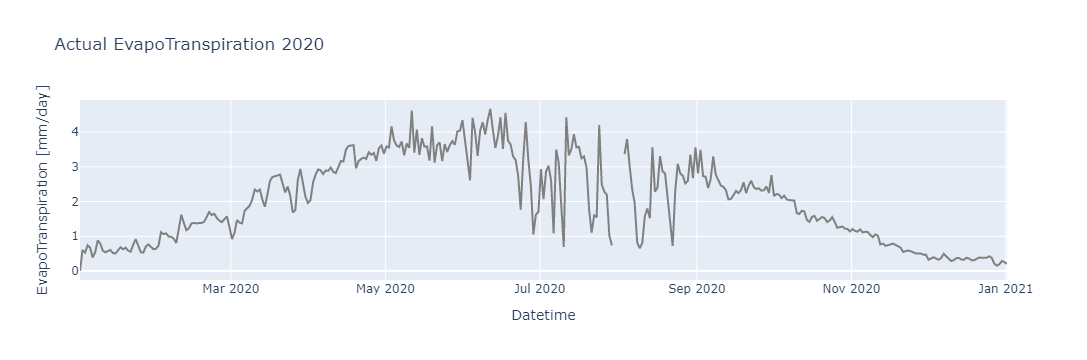

In [17]:
df6 = pd.read_csv('temperaturestressET20_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df6.columns = ['Datetime','EvapoTranspiration [mm/day]']
fig = px.line(df6, x='Datetime', y='EvapoTranspiration [mm/day]', title='Actual EvapoTranspiration 2020')
fig.update_traces(line_color='grey')
fig.show()

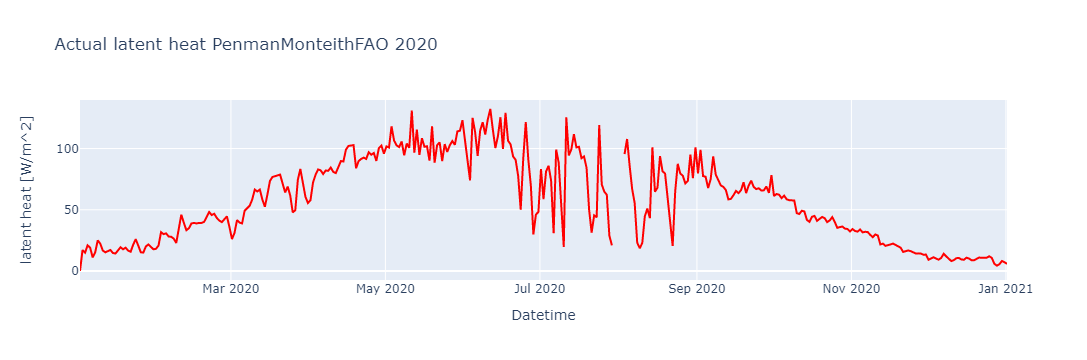

In [18]:
df5 = pd.read_csv('temperaturestressLH20_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df5.columns = ['Datetime','latent heat [W/m^2]']
fig = px.line(df5, x='Datetime', y='latent heat [W/m^2]', title='Actual latent heat PenmanMonteithFAO 2020')
fig.update_traces(line_color='red')
fig.show()

In [19]:
q=[]
w=[]
for i in range (0,366):
    q.append(i)
for j in range (0,367):
    w.append(j)
df2['day']=q
df3['day']=q
df5['day']=w
df6['day']=w

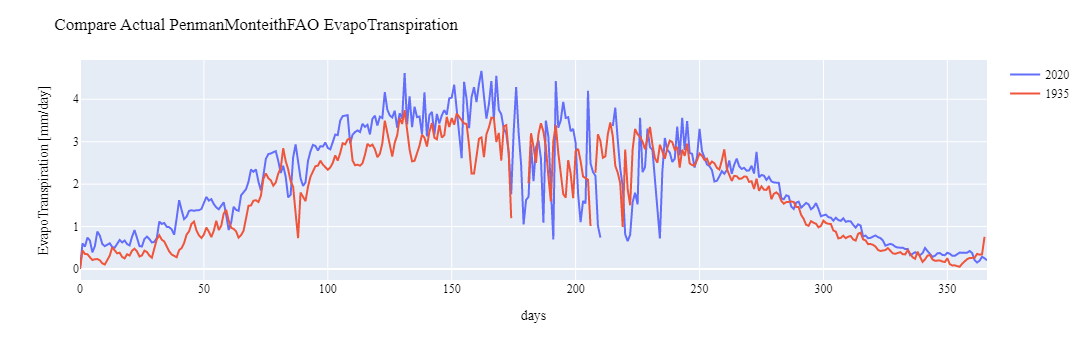

In [20]:
fig = px.line()
fig.add_trace(go.Scatter(x=df6['day'], y=df6['EvapoTranspiration [mm/day]'], mode='lines', name='2020'))
fig.add_trace(go.Scatter(x=df3['day'], y=df3['EvapoTranspiration [mm/day]'], mode='lines', name='1935'))

fig.update_layout(
    title='Compare Actual PenmanMonteithFAO EvapoTranspiration ',
    xaxis_title="days",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="EvapoTranspiration [mm/day]",
    font=dict(size=12))
fig.show()

In [21]:
df6['EvapoTranspiration [mm/day]'].mean()    #media del 2020

2.0319287032129485

In [22]:
df3['EvapoTranspiration [mm/day]'].mean()    #media del 1935

1.7532907806876847

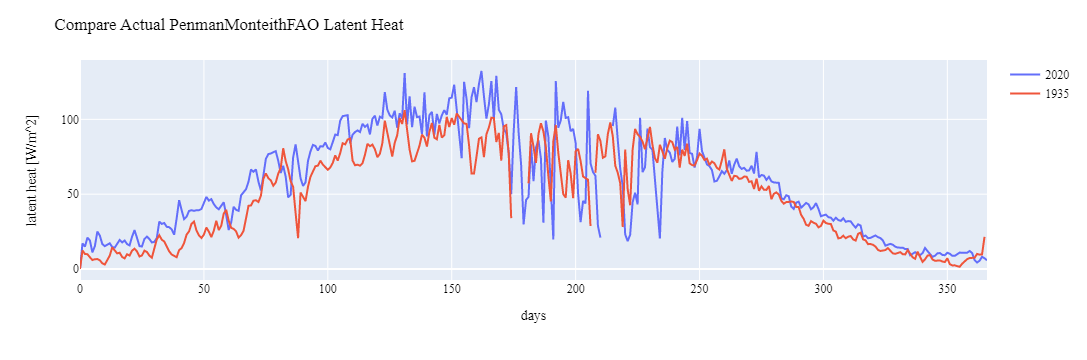

In [23]:
fig = px.line()
fig.add_trace(go.Scatter(x=df5['day'], y=df5['latent heat [W/m^2]'], mode='lines', name='2020'))
fig.add_trace(go.Scatter(x=df2['day'], y=df2['latent heat [W/m^2]'], mode='lines', name='1935'))

fig.update_layout(
    title='Compare Actual PenmanMonteithFAO Latent Heat ',
    xaxis_title="days",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="latent heat [W/m^2]",
    font=dict(size=12))
fig.show()

## Confronto tra le evaporazioni dal suolo ricavate col metodo Penmann-Montieth-FAO

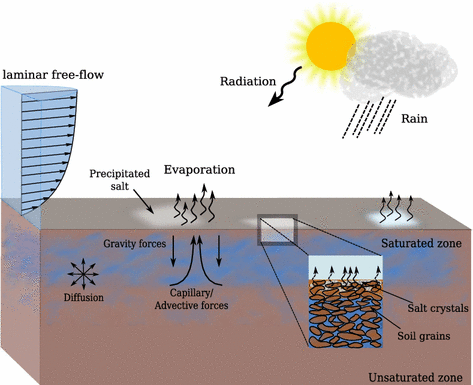

In [25]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\evaporation.png")

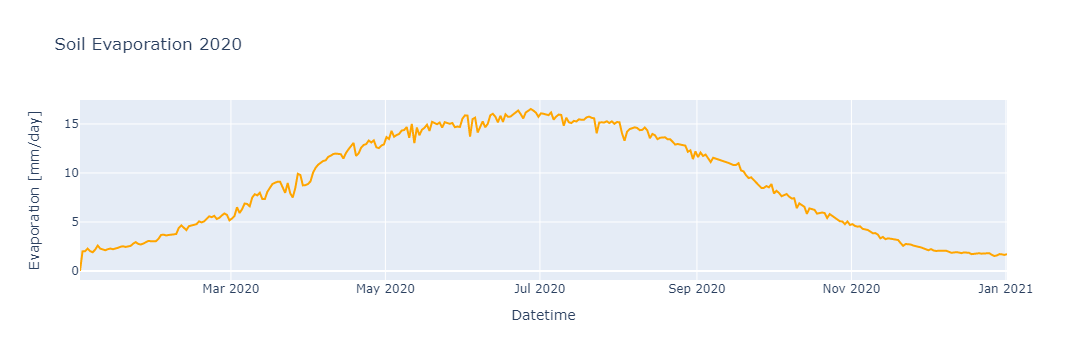

In [26]:
df7 = pd.read_csv('StressedEvaporation20_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df7.columns = ['Datetime','Evaporation [mm/day]']
fig = px.line(df7, x='Datetime', y='Evaporation [mm/day]', title='Soil Evaporation 2020')
fig.update_traces(line_color='orange')
fig.show()

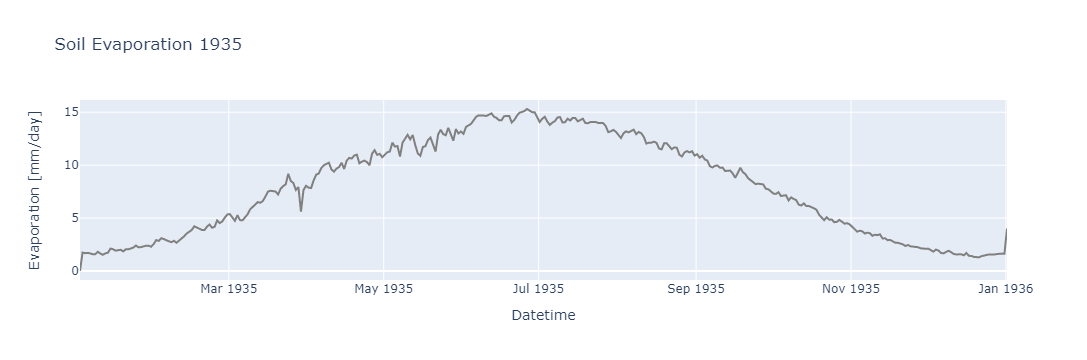

In [27]:
df8 = pd.read_csv('StressedEvaporation35_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df8.columns = ['Datetime','Evaporation [mm/day]']
fig = px.line(df8, x='Datetime', y='Evaporation [mm/day]', title='Soil Evaporation 1935')
fig.update_traces(line_color='grey')
fig.show()

In [28]:
q=[]
w=[]
for i in range (0,366):
    q.append(i)
for j in range (0,367):
    w.append(j)
df8['day']=q
df7['day']=w

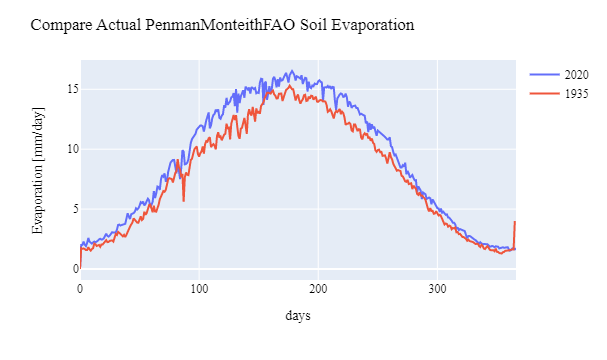

In [31]:
fig = px.line()
fig.add_trace(go.Scatter(x=df7['day'], y=df7['Evaporation [mm/day]'], mode='lines', name='2020'))
fig.add_trace(go.Scatter(x=df8['day'], y=df8['Evaporation [mm/day]'], mode='lines', name='1935'))

fig.update_layout(
    title='Compare Actual PenmanMonteithFAO Soil Evaporation ',
    xaxis_title="days",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="Evaporation [mm/day]",
    font=dict(size=12))
fig.show()

Dalle simulazioni si evince come l'aumento di temperatura, dovuto al surriscaldamento globale, abbia portato ad un significativo aumento del fenomeno di evapotraspirazione.

Per il fenomeno di evaporazione dal suolo invece si riscontra un aumento dell'evaporazione ma non risulta essere altrettanto significativo come quello legato all'evapotraspirazione.

----
----

# **EvapoTranspiration Penman-MonteithFAO & Prospero**
- Author of the source code Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon
- Modified by Niccolò Schiavi Cappello, Marco Feltrin and Alessandro Lagrecacolonna
-------
## Si unisce il modello di traspirazione delle piante (Prospero) con il modello di evaporazione (PMFao)

L'ipotesi di partenza di questo notebook stà nel simulare i possibili risvolti e complicazioni nella gestione delle colture nell' arco temporale
dal 2021/09/01 fino al 2023/01/01.
Dato l'inverno trascorso estremamente siccitoso, si è voluto provare a prevedere una possibile evoluzione della stagione vitivinicola 2021/2022, 
creando un' importante strumento gestionale per le realtà della zona presa in esame. 

Sono stati creati due possibili scenari estivi di regime pluviometrico nel periodo(/06/01 al /09/01):
Un estate piovosa 491mm - dati del 2014
Un estate siccitosa 195 mm - dati del 2004

La serie in cui sono stati inseriti i dati proviene dal periodo 2019/09/01 al 2021/01/01 dalla stazione meteo di Rovereto.

I dati geografici provengono dalla località di Calliano(TN) utilizzate precedentemente.


## input necessari per la simulazione
- Dem
- Centroids
- Temperatura dell'aria
- Velocità del vento
- Umidità Relativa 
- Radiazione onda corta diretta
- Radiazione onda corta diffusa
- Radiazione onda lunga
- Radiazione netta
- Pressione atmosferica
- Leaf Area Index (LAI)
- Contenuto d'acqua nel suolo -(dati estratti dalla simulazione di WHETGEO, con i dati del terreno presi dall' atlante geologico provinciale) 
- Flusso di calore dal suolo
----
## output della simulazione
- Calore latente per le parti al sole e all ombra della chioma [$W/m^{2}$];
- Flusso di Evaporatione, Traspiratione, Evapotranspiratione [$W/m^{2}$];
- Evapotranspiratione [$mm$];
- Temperatra delle foglie esposte al sole e all' ombra [$W/m^{2}$];
- Calore sensibile per la chioma espota al sole e all'ombra [$W/m^{2}$];
- Frazione di chioma illuminata [-];
- Radiazione a onda corta assorbita dalla chioma al sole e all' ombra [$W/m^{2}$];

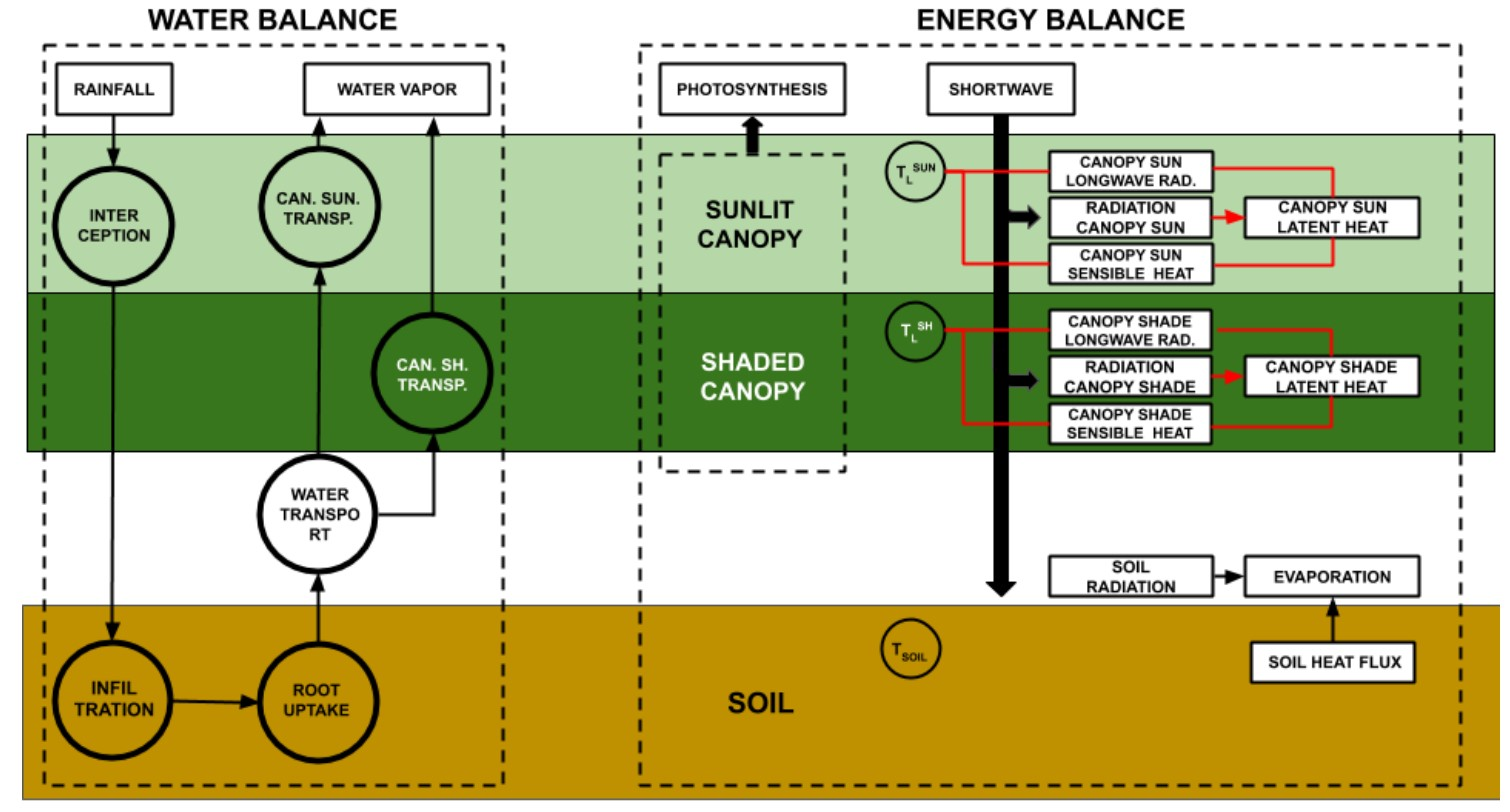

In [32]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\Prospero function.jpg")

si calcola sempre la traspirazione efettiva, poichè teniamo conto della foglia

I vari valori di LAI sono stati presi dai dati sperimentali da un paper, per maggiori informazioni: https://www.researchgate.net/publication/225666686_Water_use_and_the_development_of_seasonal_crop_coefficients_for_Superior_Seedless_grapevines_trained_to_an_open-gable_trellis_system

dove si ipotizza un sesto di impianto a pergola doppia trentina

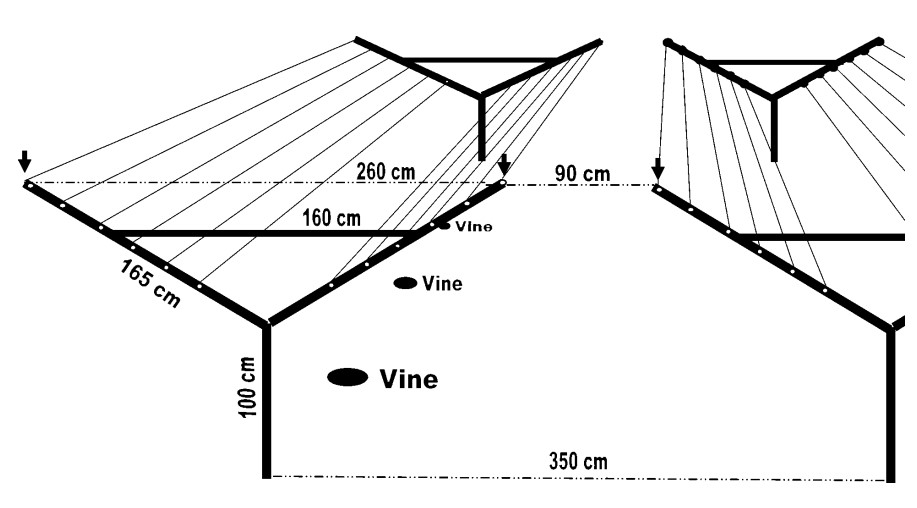

In [33]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\sesto_impianto.jpg")

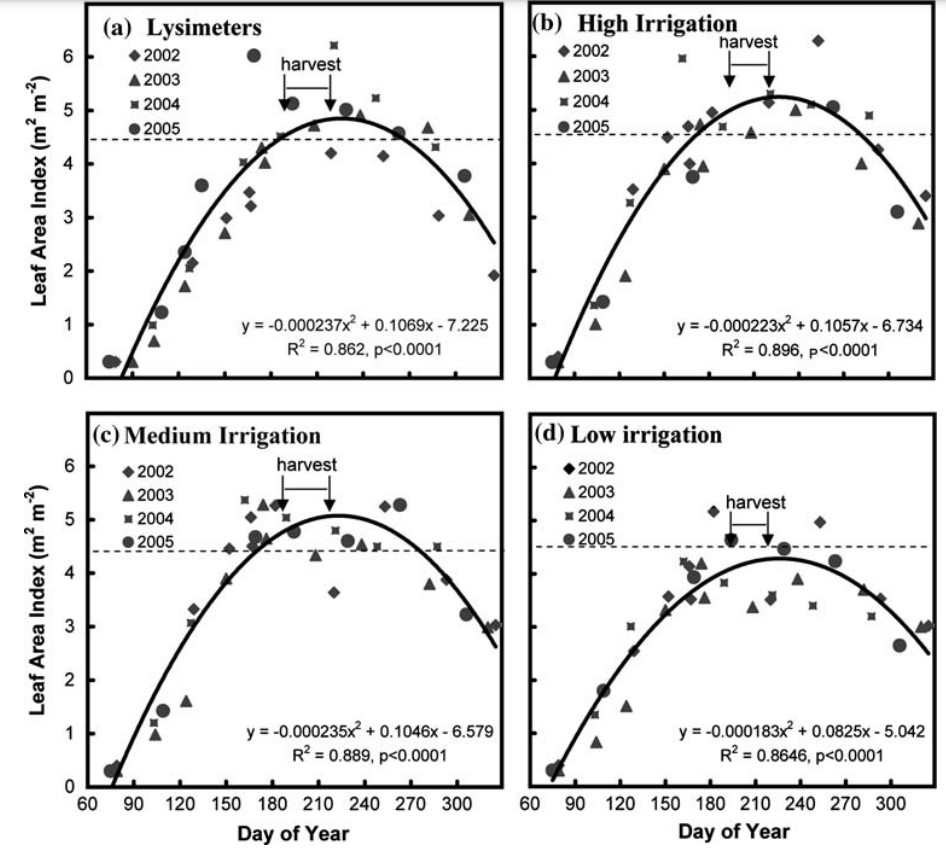

In [34]:
Image("C:\\Users\marco\Desktop\progetto_idrologia_Evaptra\JupyterNotebook\LAI_calculation.jpg")

# Analisi delle Previsioni di Precipitazione

In [35]:
tabs=os.chdir(oms_project_path+'/data/Calliano/1')
#os.listdir()

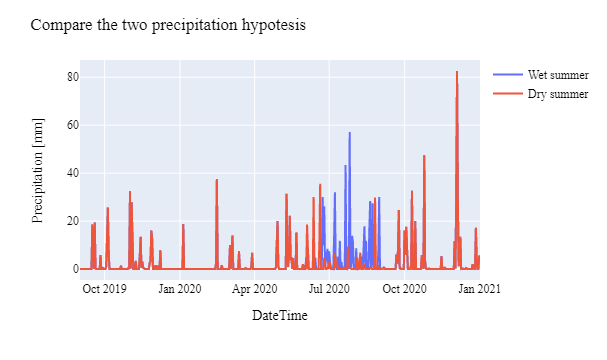

In [36]:
ws = pd.read_csv('precip_wet_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
ws.columns = ['Datetime','Precipitation']
ds = pd.read_csv('precip_dry_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
ds.columns = ['Datetime','Precipitation']

fig = px.line()
fig.add_trace(go.Scatter(x=ws['Datetime'], y=ws['Precipitation'], mode='lines', name='Wet summer'))
fig.add_trace(go.Scatter(x=ds['Datetime'], y=ds['Precipitation'], mode='lines', name='Dry summer'))

fig.update_layout(
    title='Compare the two precipitation hypotesis',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="Precipitation [mm]",
    #legend_title="Date",
    font=dict(size=12))
fig.show()

Altezza delle due serie temporali di precipitazione
con estate piovosa (491 mm)

In [39]:
ws['Precipitation'].sum()

1396.2000000000003

con estate secca (195 mm)

In [40]:
ds['Precipitation'].sum()

1100.2

---
## **Analizziamo le differeneze dei flussi di evaporazione,traspirazione e evapotraspirazione**
In consizioni di solo stress idrico.

In [41]:
os.chdir(oms_project_path+'/output/Calliano/1')
#os.listdir()

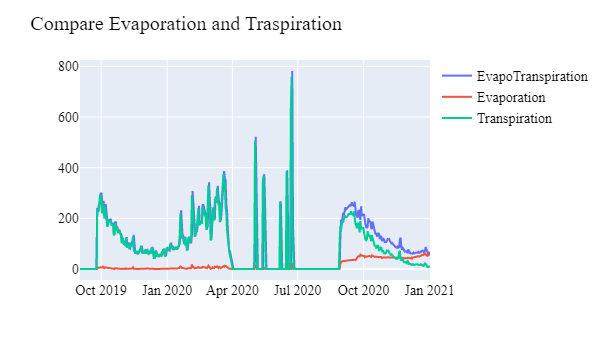

In [42]:
show_E_T('FluxEvapoTranspiration_1_waterstress_dry.csv',
         'FluxEvaporation_1_waterstress_dry.csv',
         'FluxTranspiration_1_waterstress_dry.csv')

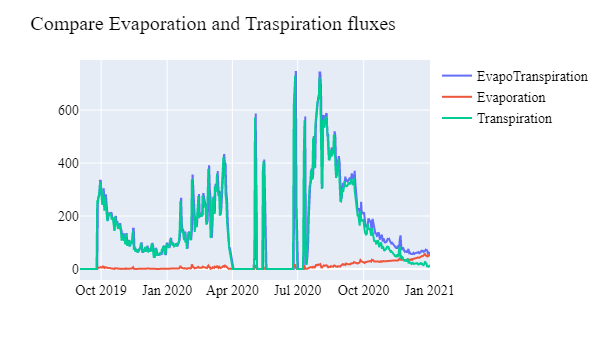

In [39]:
show_E_T('FluxEvapoTranspiration_1_waterstress_wet.csv',
         'FluxEvaporation_1_waterstress_wet.csv',
         'FluxTranspiration_1_waterstress_wet.csv')

### Analiziamo le quantità di evaporazione,traspirazione ed evapotraspirazione

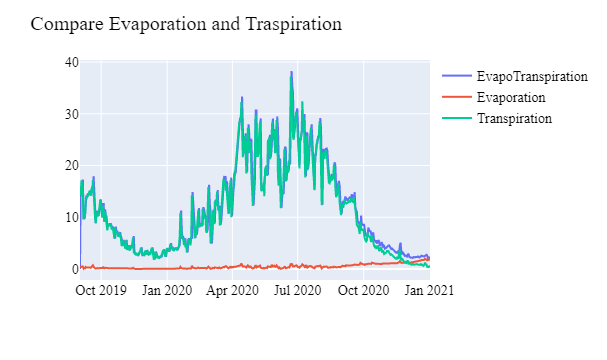

In [43]:
show_E_T('EvapoTranspiration_1_potential_wet.csv',
         'Evaporation_1_potential_wet.csv',
         'Transpiration_1_potential_wet.csv')

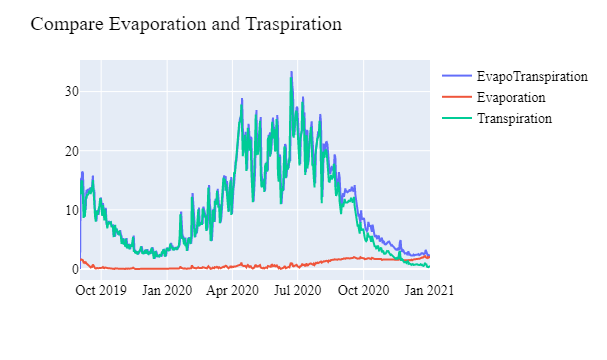

In [44]:
show_E_T('EvapoTranspiration_1_potential_dry.csv',
         'Evaporation_1_potential_dry.csv',
         'Transpiration_1_potential_dry.csv')

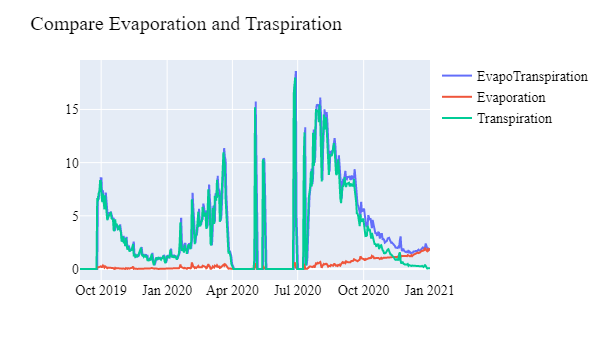

In [45]:
show_E_T('EvapoTranspiration_1_totalstress_wet.csv',
         'Evaporation_1_totalstress_wet.csv',
         'Transpiration_1_totalstress_wet.csv')

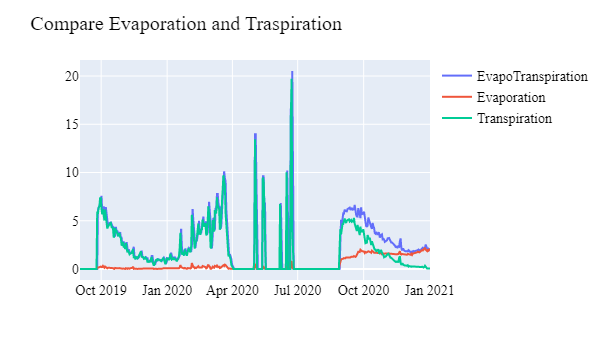

In [46]:
show_E_T('EvapoTranspiration_1_totalstress_dry.csv',
         'Evaporation_1_totalstress_dry.csv',
         'Transpiration_1_totalstress_dry.csv')

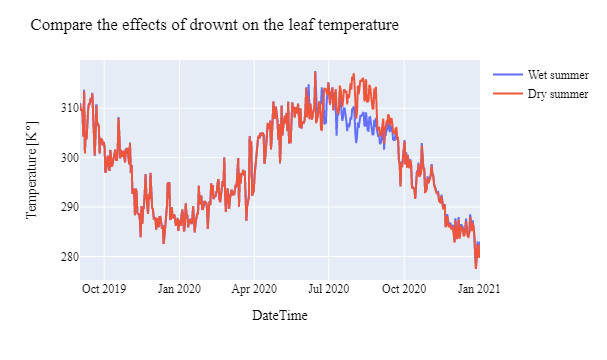

In [47]:
LT_w = pd.read_csv('LT_Sun_1_totalstress_wet.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
LT_w.columns = ['Datetime','Temperature']
LT_d = pd.read_csv('LT_Sun_1_totalstress_dry.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
LT_d.columns = ['Datetime','Temperature']

fig = px.line()
fig.add_trace(go.Scatter(x=LT_w['Datetime'], y=LT_w['Temperature'], mode='lines', name='Wet summer'))
fig.add_trace(go.Scatter(x=LT_d['Datetime'], y=LT_d['Temperature'], mode='lines', name='Dry summer'))

fig.update_layout(
    title='Compare the effects of drownt on the leaf temperature',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="Temperature [K°]",
    #legend_title="Date",
    font=dict(size=12))
fig.show()